In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
import selenium
from selenium import webdriver
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
driver1=webdriver.Chrome(r"C:\Users\Bhumik Shah\Downloads\chromedriver_win32 (4)\chromedriver.exe")

In [3]:
url='https://www.flipkart.com/'

In [4]:
driver1.get(url)

In [6]:
product=driver1.find_element_by_xpath("//div[@class='_3OO5Xc']//input")

In [7]:
product.send_keys('Phones')

In [8]:
click1=driver1.find_element_by_xpath("//button[@class='L0Z3Pu']")
click1.click()

In [9]:
urls=[]
for e in range(0,10):
    url=driver1.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for k in url:
        urls.append(k.get_attribute("href"))
    nxt_button=driver1.find_elements_by_xpath("//a[@class='_1LKTO3']")
    try:
        driver1.get(nxt_button[1].get_attribute('href'))
        time.sleep(2)
    except:
        driver1.get(nxt_button[0].get_attribute('href'))
        time.sleep(2)

In [10]:
len(urls)

240

In [11]:
ratings=[]
full_reviews=[]
for k in urls:
    driver1.get(k)
    time.sleep(3)
    try:
        driver1.find_element_by_xpath("//div[@class='_3UAT2v _16PBlm']").click() # clcik on see all reviews
        time.sleep(2)
        # fetching first pages reviews
        for a in driver1.find_elements_by_xpath("//div[@class='t-ZTKy']/div/div"):
            full_reviews.append(a.text)
        for b in driver1.find_elements_by_xpath("//div[@class='col _2wzgFH K0kLPL']/div[1]/div[1]"):
            ratings.append(b.text)
        time.sleep(1)
        #clciking on second page for reviews
        driver1.find_element_by_xpath("//a[@class='_1LKTO3']/span").click()
        time.sleep(2)
        # running loop till the end of pages of all reviews
        while True:
            time.sleep(2)
            for i in driver1.find_elements_by_xpath("//div[@class='t-ZTKy']/div/div"):
                full_reviews.append(i.text)
            for j in driver1.find_elements_by_xpath("//div[@class='col _2wzgFH K0kLPL']/div[1]/div[1]"):
                ratings.append(j.text)
            try:
                driver1.find_element_by_xpath("//a[@class='_1LKTO3'][2]/span").click()
                time.sleep(1)
            except:
                break
    except:
        print("no reviews")

no reviews
no reviews
no reviews


In [16]:
df1=pd.DataFrame({})

In [17]:
df1['ratings']=ratings
df1['reviews']=full_reviews

In [18]:
df1

ratings                                            reviews
0          5  Best for this price range but camera is ok per...
1          5  Good budget phone. Best battery and best perfo...
2          5  Nice entry level smartphone.. too good for fam...
3          4  Phone is good but camera quality is not so goo...
4          5  Very nice mobile in this price\nBattery perfor...
...      ...                                                ...
8925       5  Mobile is really worth for money, design also ...
8926       5  This is amazing product it works properly and ...
8927       5  Wow amazing product this price and value for m...
8928       5  Superb product\n>>Camera performance is too go...
8929       4  Wonderful\nVery good looking phone but it's sl...

[8930 rows x 2 columns]

In [19]:
data1=df1.to_csv('Flipkart data.csv')

# Data Extraction completed from flipkart

In [12]:
driver2=webdriver.Chrome(r"C:\Users\Bhumik Shah\Downloads\chromedriver_win32 (4)\chromedriver.exe")

In [13]:
url='https://www.amazon.in/'

In [14]:
driver2.get(url)

In [15]:
searchbar=driver2.find_element_by_id('twotabsearchtextbox') # searching for different options available in headphone category
searchbar.send_keys("headphones")
search_click=driver2.find_element_by_id('nav-search-submit-button')
search_click.click()

In [16]:
product_urls = []
start=0
end=4
for page in range(start,end):
    url=driver2.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')       #scraping urls
    for i in url:
        product_urls.append(i.get_attribute("href"))                        #appending the urls in product_urls list
    nxt_button=driver2.find_element_by_xpath("//li[@class='a-last']//a")     #scraping the list of buttons from the page
    driver2.get(nxt_button.get_attribute("href"))

In [17]:
from selenium.common.exceptions import NoSuchElementException
reviews=[]
ratings=[]

for i in product_urls:
    driver2.get(i)
    time.sleep(2)
    try:
        driver2.find_element_by_xpath("//a[@class='a-link-emphasis a-text-bold']").click() # to click on see all reviewes
        time.sleep(5)
    # fetching first page reviews
        for q in driver2.find_elements_by_xpath("//span[@class='a-size-base review-text review-text-content']/span"):
            reviews.append(q.text)
        for s in driver2.find_elements_by_xpath("//i[@data-hook='review-star-rating']"):
            ratings.append(s.get_attribute('class'))
        time.sleep(1)
    #clicking on second page for reviews
        driver2.find_element_by_xpath('//ul[@class="a-pagination"]/li[2]/a').click()
        time.sleep(2)
        while True:
            for e in driver2.find_elements_by_xpath("//span[@class='a-size-base review-text review-text-content']/span"):
                reviews.append(e.text)
            for t in driver2.find_elements_by_xpath("//i[@data-hook='review-star-rating']"):
                ratings.append(t.get_attribute('class'))
            try:
                driver2.find_element_by_xpath('//ul[@class="a-pagination"]/li[2]/a').click()
                time.sleep(2)
            except:
                break
    except:
        print("no reviews")

no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews
no reviews


In [23]:
complete_text = []
for m in ratings:
    complete_text.append(m.split())
    
complete_text

[['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-2', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-5', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-5', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-5', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-3', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-3', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-2', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-5', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-5', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-1', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-star-5', 'review-rating'],
 ['a-icon', 'a-icon-star', 'a-s

In [24]:
Ratings = []
for n in complete_text:
    Ratings.append(n[2][7])
Ratings


['1',
 '2',
 '5',
 '1',
 '5',
 '1',
 '5',
 '1',
 '3',
 '3',
 '1',
 '2',
 '5',
 '5',
 '1',
 '1',
 '5',
 '1',
 '4',
 '4',
 '5',
 '2',
 '1',
 '1',
 '5',
 '1',
 '1',
 '5',
 '1',
 '4',
 '1',
 '2',
 '5',
 '3',
 '5',
 '1',
 '1',
 '1',
 '3',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '4',
 '2',
 '3',
 '3',
 '1',
 '1',
 '1',
 '5',
 '2',
 '4',
 '4',
 '5',
 '1',
 '3',
 '5',
 '2',
 '5',
 '1',
 '2',
 '1',
 '2',
 '5',
 '4',
 '5',
 '3',
 '1',
 '2',
 '1',
 '5',
 '4',
 '4',
 '1',
 '4',
 '1',
 '5',
 '5',
 '4',
 '5',
 '4',
 '1',
 '4',
 '1',
 '1',
 '3',
 '1',
 '5',
 '5',
 '5',
 '1',
 '1',
 '1',
 '1',
 '5',
 '4',
 '5',
 '1',
 '2',
 '4',
 '3',
 '5',
 '1',
 '2',
 '5',
 '5',
 '1',
 '4',
 '3',
 '1',
 '1',
 '1',
 '1',
 '4',
 '5',
 '3',
 '1',
 '5',
 '3',
 '1',
 '1',
 '4',
 '1',
 '5',
 '4',
 '2',
 '1',
 '1',
 '4',
 '1',
 '1',
 '4',
 '4',
 '2',
 '5',
 '4',
 '3',
 '5',
 '4',
 '3',
 '3',
 '1',
 '5',
 '5',
 '5',
 '3',
 '3',
 '4',
 '1',
 '4',
 '2',
 '4',
 '5',
 '4',
 '1',
 '1',
 '2',
 '4',
 '3',
 '5',
 '4'

In [25]:
df2=pd.DataFrame({'reviews':reviews[:25000],'ratings':Ratings[:25000]})

In [26]:
df2

reviews ratings
0      It has great sound quality and bass but after ...       1
1      [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...       2
2      This is a premium quality product from boAt-Li...       5
3      The boAt Rockerz line is boAt's super cheap li...       1
4      These are super comfortable and premium lookin...       5
...                                                  ...     ...
24995                     Vouce quality is not that good       5
24996  Sound quality is too good, bass is working goo...       4
24997  Good headphones by infinity (jbl)\nSound quali...       4
24998  Cannot use continue due to ear's pain and soun...       5
24999  Very neat sound. Battery backup is excellent. ...       1

[25000 rows x 2 columns]

In [27]:
data2=df2.to_csv('Amazon data.csv')

In [28]:
data2

# Data Extracted from Amazon

# Training the model with data extracted from amzaon and flipkart

In [2]:
df1=pd.read_csv('flipkart data.csv')

In [3]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df1

ratings                                            reviews
0           5  Best for this price range but camera is ok per...
1           5  Good budget phone. Best battery and best perfo...
2           5  Nice entry level smartphone.. too good for fam...
3           4  Phone is good but camera quality is not so goo...
4           5  Very nice mobile in this price\nBattery perfor...
...       ...                                                ...
8925        5  Mobile is really worth for money, design also ...
8926        5  This is amazing product it works properly and ...
8927        5  Wow amazing product this price and value for m...
8928        5  Superb product\n>>Camera performance is too go...
8929        4  Wonderful\nVery good looking phone but it's sl...

[8930 rows x 2 columns]

In [5]:
df2=pd.read_csv('Amazon data.csv')

In [6]:
df2

Unnamed: 0                                            reviews  ratings
0               0  It has great sound quality and bass but after ...        1
1               1  [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2
2               2  This is a premium quality product from boAt-Li...        5
3               3  The boAt Rockerz line is boAt's super cheap li...        1
4               4  These are super comfortable and premium lookin...        5
...           ...                                                ...      ...
24995       24995                     Vouce quality is not that good        5
24996       24996  Sound quality is too good, bass is working goo...        4
24997       24997  Good headphones by infinity (jbl)\nSound quali...        4
24998       24998  Cannot use continue due to ear's pain and soun...        5
24999       24999  Very neat sound. Battery backup is excellent. ...        1

[25000 rows x 3 columns]

In [11]:
df2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df2

Unnamed: 0                                            reviews  ratings
0               0  It has great sound quality and bass but after ...        1
1               1  [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2
2               2  This is a premium quality product from boAt-Li...        5
3               3  The boAt Rockerz line is boAt's super cheap li...        1
4               4  These are super comfortable and premium lookin...        5
...           ...                                                ...      ...
24995       24995                     Vouce quality is not that good        5
24996       24996  Sound quality is too good, bass is working goo...        4
24997       24997  Good headphones by infinity (jbl)\nSound quali...        4
24998       24998  Cannot use continue due to ear's pain and soun...        5
24999       24999  Very neat sound. Battery backup is excellent. ...        1

[25000 rows x 3 columns]

# Appending the data from dataframe df1 into df2 

In [8]:
df3=df2.append(df1)

In [9]:
df3

Unnamed: 0                                            reviews  ratings
0            0.0  It has great sound quality and bass but after ...        1
1            1.0  [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2
2            2.0  This is a premium quality product from boAt-Li...        5
3            3.0  The boAt Rockerz line is boAt's super cheap li...        1
4            4.0  These are super comfortable and premium lookin...        5
...          ...                                                ...      ...
8925         NaN  Mobile is really worth for money, design also ...        5
8926         NaN  This is amazing product it works properly and ...        5
8927         NaN  Wow amazing product this price and value for m...        5
8928         NaN  Superb product\n>>Camera performance is too go...        5
8929         NaN  Wonderful\nVery good looking phone but it's sl...        4

[33930 rows x 3 columns]

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33930 entries, 0 to 8929
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25000 non-null  float64
 1   reviews     33840 non-null  object 
 2   ratings     33930 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ MB


There are in total 33930 records and 2 features named as reviews and ratings.

The feature named as reviews is having object datatype and ratings is having integer datatype.

In [11]:
plt.figure(figsize=[16,8])
sns.heatmap(df3.isnull())
plt.show()

In [13]:
df3.isnull().sum()

Unnamed: 0    8930
reviews         90
ratings          0
dtype: int64

From the heatmap it can be said there are null values present in the feature named as reviews.

In [14]:
df5=df3.copy()

In [17]:
df5.dropna(inplace=True)

In [18]:
df5

Unnamed: 0                                            reviews  ratings
0             0.0  It has great sound quality and bass but after ...        1
1             1.0  [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2
2             2.0  This is a premium quality product from boAt-Li...        5
3             3.0  The boAt Rockerz line is boAt's super cheap li...        1
4             4.0  These are super comfortable and premium lookin...        5
...           ...                                                ...      ...
24995     24995.0                     Vouce quality is not that good        5
24996     24996.0  Sound quality is too good, bass is working goo...        4
24997     24997.0  Good headphones by infinity (jbl)\nSound quali...        4
24998     24998.0  Cannot use continue due to ear's pain and soun...        5
24999     24999.0  Very neat sound. Battery backup is excellent. ...        1

[24910 rows x 3 columns]

In [19]:
df5.isnull().sum()

Unnamed: 0    0
reviews       0
ratings       0
dtype: int64

The null values present in the feature named as reviews are eliminated.

In [20]:
df5['ratings'].value_counts()

5    11455
1     4883
4     4543
3     2428
2     1601
Name: ratings, dtype: int64

The maximum records i.e 17164 are for ratings 5 and the minimum records i.e 1776 are for ratings 1.

There is an imbalance in the dataset as there is a hugh difference between the majority class and the minority class. 

In [21]:
df5['reviews'].str.len().sum()

4373373

Removing stopwords, punctutations from the feature named as ratings.

In [84]:
#Remove whitespace between terms with a single space from the reviews feature.
df5['reviews']=df5['reviews'].str.replace(r',\s+',' ') # using regex to replace white space terms.

In [85]:
# Remove punctuation from the reviews feature
df5['reviews']=df5['reviews'].str.replace(r'[^\w\d\s]',' ')

In [86]:
# Remove trailing and leading whitespace from the reviews feature
df5['reviews']=df5['reviews'].str.replace(r'^\s+|\s+?$','')

In [87]:
# Removing numbers from the reviews feature.
df5['reviews']=df5['reviews'].str.replace(r'[0-9]+'," ")

In [51]:
import nltk

In [52]:
from nltk.corpus import stopwords

In [53]:
stp=stopwords.words('english')

In [54]:
df5['reviews']=df5['reviews'].str.lower()

In [57]:
df5['reviews']=df5['reviews'].apply(lambda x: " ".join(term for term in x.split() if term not in stp))

In [59]:
df5['clean length']=df5['reviews'].str.len()

In [74]:
df5

reviews  ratings  clean length
0     great sound quality bass months use got break ...        1           252
1     big update broke along right hinge wearing nor...        2          1007
2     premium quality product boat lifestyle profess...        5           373
3     boat rockerz line boat super cheap lineup budg...        1          1894
4     super comfortable premium looking headphones b...        5           322
...                                                 ...      ...           ...
8925  mobile really worth money design also good pri...        5           257
8926  amazing product works properly display also go...        5            58
8927  wow amazing product price value money display ...        5           101
8928  superb product camera performance good price e...        5           363
8929  wonderful good looking phone slow ya slow good...        4           287

[33840 rows x 3 columns]

In [75]:
df5['clean length'].sum()

3747863

After cleaning the data the length of clean data is 3747863 and the length of uncleaned data as per above is 5630544. 

# Visulizations of words that appear no of times

In [77]:
from wordcloud import WordCloud

In [78]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df5[df5['ratings']==1]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The word such as sound quality having ratings 1 are repeated most. Further it can be said that the sound quality of the product might not be that great that's why rating is given as 1.

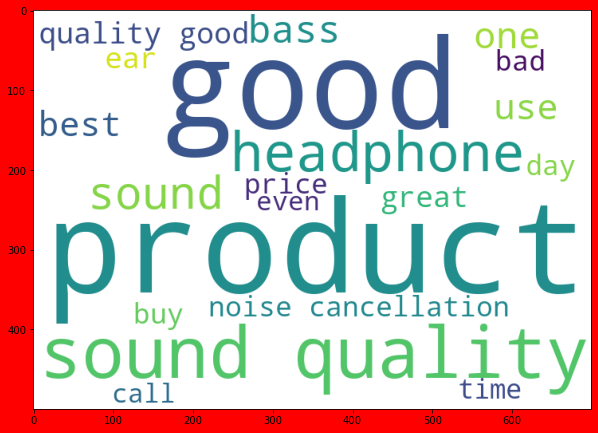

In [79]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df5[df5['ratings']==2]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The words such as sound quality,product having ratings 2 are repeated most. Further it can be said that the sound quality as well as the overall quality of product might not be that much appealing that's why rating is given as 2.

In [80]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df5[df5['ratings']==3]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The word such as good having ratings 3 is repeated most. Further, it can be said the overall quality of the product is good that's why rating is given as 3.

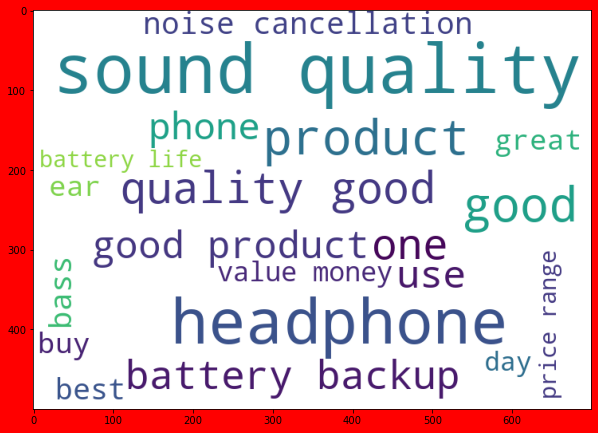

In [81]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df5[df5['ratings']==4]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

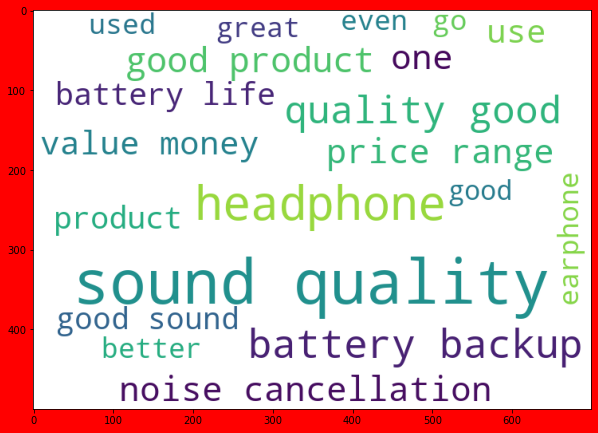

In [82]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df5[df5['ratings']==5]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The words such as great, value for money, good sound, battery life, battery backup having ratings 5 are repeated the most.Further, it can be said the overall quality of a product is great i.e in terms of sound quality, battery life, battery backup that's why rating is given as 5.

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Vectorizing the words using tfidf Vectorizer

In [89]:
tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(df5['reviews'])
X=features
X

<33840x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 494835 stored elements in Compressed Sparse Row format>

# Splitting data and Training the model 

In [91]:
y=df5['ratings']

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [94]:
mn=MultinomialNB()
mn.fit(X_train,y_train)
pred=mn.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.5116725768321513
[[  12    0    2    3 1058]
 [   3    0    0    1  316]
 [   5    1    0    2  620]
 [   6    0    0   22 1261]
 [  19    2    3    3 3429]]


In [95]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred1=dtc.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))

0.4509456264775414
[[ 229   60   76  172  538]
 [  58   18   16   51  177]
 [  91   27   90  101  319]
 [ 145   38   73  351  682]
 [ 385  109  190  408 2364]]


In [96]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred2=knn.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))

0.40484633569739953
[[ 377   58   55  175  410]
 [  91   24   29   50  126]
 [ 197   22   70   94  245]
 [ 319   55   62  342  511]
 [ 799  132  145  453 1927]]


In [97]:
svc=SVC()
svc.fit(X_train,y_train)
pred3=svc.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))

0.5463947990543735
[[  85    0    0    1  989]
 [  15    6    1    0  298]
 [  31    0   38    4  555]
 [  32    0    1  202 1054]
 [  74    0    3   12 3367]]


In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred4=rfc.predict(X_test)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))

0.5369385342789598
[[  89    5    3   21  957]
 [  19    6    3    4  288]
 [  22    0   53   27  526]
 [  23    0    4  217 1045]
 [  94    8   15   70 3269]]


In [100]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [102]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred5=ada.predict(X_test)
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))

0.49763593380614657
[[ 106    9    6    0  954]
 [  35    2    2    1  280]
 [  45    5   10    1  567]
 [  69    9    3    1 1207]
 [ 182   12    8    5 3249]]


In [104]:
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)
pred6=gr.predict(X_test)
print(accuracy_score(y_test,pred6))
print(confusion_matrix(y_test,pred6))

0.5231973995271868
[[  37    3    4    3 1028]
 [  10    6    1    2  301]
 [  13    0   25    2  588]
 [  11    0    1   69 1208]
 [  44    1    2    5 3404]]


# Calculating cross_val_score

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
score=cross_val_score(mn,X,y,cv=5)
print(score.mean())

0.5049054373522458


In [107]:
score1=cross_val_score(dtc,X,y,cv=5)
print(score1.mean())

0.38457446808510637


In [108]:
score2=cross_val_score(knn,X,y,cv=5)
print(score2.mean())

0.3397163120567376


In [ ]:
score3=cross_val_score(svc,X,y,cv=5)
print(score3.mean())

In [ ]:
score4=cross_val_score(rfc,X,y,cv=5)
print(score4.mean())

In [ ]:
score5=cross_val_score(ada,X,y,cv=5)
print(score5.mean())

In [ ]:
score6=cross_val_score(gr,X,y,cv=5)
print(score6.mean())